<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/CED_EA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones de entrega

* Genere una copia de este notebook para que desarrolle su entrega: Archivo -> Guardar una copia en drive
* Genere un enlace para compartir de este notebook (parte superior derecha --> opción "compartir", "cualquier persona con el enlace") y súbalo a canvas como entrega.
* En la celda inferior, agregue los nombres de los integrantes del equipo. Sólo adjunten una entrega por equipo.

1. Juan Felipe Cardona Arango
2. 
3. 
4. 

# Contexto

* En el peaje de occidente necesitan entender la distribución de probabilidad de la cantidad de automóviles que pasan por su peaje diariamente. Para esto, le proveen a usted como analista un histórico de los registros de cantidad de automóviles que pasaron por su peaje entre el 2021 y parte del 2022. 
* En este archivo se encontrará la cantidad de automóviles que pasaron por el peaje hora a hora. Sin embargo, algunos días hubo fallas en el gestor de base de datos y no se pudo registrar esta cantidad hora a hora sino en lapsos de dos horas.
* Use [este archivo](https://docs.google.com/spreadsheets/d/18K2SUD1uQgGR_G2GgEiWtTZMCnqT4A2uD_gcvnAXsyg/edit?usp=sharing) para responder las siguientes preguntas. 

# Ayudas

* Use Pandas para cargar y gestionar la información
* Use el parámetro "parse_dates" del método "read_csv" de pandas para convertir las fechas cargadas en el archivo: https://www.skytowner.com/explore/parsing_dates_when_using_read_csv_in_pandas
* Tenga en cuenta que deberá tratar los lapsos diferentes a una hora para que no se afecte el cálculo de la media


In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta



In [2]:
df=pd.read_excel("/content/datos_peaje.xlsx",parse_dates=["Hora inicio","Hora fin"])

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       8364 non-null   int64         
 1   Hora inicio      8364 non-null   datetime64[ns]
 2   Hora fin         8364 non-null   datetime64[ns]
 3   Promedio carros  8364 non-null   int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 261.5 KB


In [4]:
df.head()

,Unnamed: 0,Hora inicio,Hora fin,Promedio carros
0,0,2021-03-21 00:00:00,2021-03-21 02:00:00,857
1,1,2021-03-21 02:00:00,2021-03-21 03:00:00,400
2,2,2021-03-21 03:00:00,2021-03-21 04:00:00,396
3,3,2021-03-21 04:00:00,2021-03-21 06:00:00,759
4,4,2021-03-21 06:00:00,2021-03-21 07:00:00,423


In [5]:
df.tail()

,Unnamed: 0,Hora inicio,Hora fin,Promedio carros
8359,8359,2022-05-11 09:00:00,2022-05-11 11:00:00,793
8360,8360,2022-05-11 11:00:00,2022-05-11 12:00:00,403
8361,8361,2022-05-11 12:00:00,2022-05-11 14:00:00,786
8362,8362,2022-05-11 14:00:00,2022-05-11 15:00:00,389
8363,8363,2022-05-11 15:00:00,2022-05-11 16:00:00,432


# Preparacion de los datos:Analisis Exploratorio

Creando una columna extrayendo solo la hora de inico

In [6]:
df["Hora de inicio"]=df["Hora inicio"].dt.time

In [7]:
df["Hora de fin"]=df["Hora fin"].dt.time

Creando una columna estrayendo solo la hora de fin 

Calculando la diferencia entre la hora de fin y de inicio para observar la distirbucon de los datos 

In [8]:
df["tiempo de operacion"]=df["Hora fin"].dt.hour -df["Hora inicio"].dt.hour

In [9]:
df["tiempo de operacion"]

0       2
1       1
2       1
3       2
4       1
       ..
8359    2
8360    1
8361    2
8362    1
8363    1
Name: tiempo de operacion, Length: 8364, dtype: int64

Se crean dos listas segun el promedio de carros y tiempo de operacion para facilitar la iteraccion con el ciclo de control

In [10]:
fg=df["tiempo de operacion"]

In [11]:
sd=df["Promedio carros"]

## Datos Atipicos

In [12]:
df.describe()

,Unnamed: 0,Promedio carros,tiempo de operacion
count,8364.000000,8364.000000,8364.000000
mean,4181.500000,477.943568,0.001913
std,2414.623159,159.460708,5.204051
min,0.000000,330.000000,-23.000000
25%,2090.750000,390.000000,1.000000
50%,4181.500000,406.000000,1.000000
75%,6272.250000,430.000000,1.000000
max,8363.000000,908.000000,2.000000


Al revisar las propiedades de distribucion de los datos respecto al tiempo de operacion de observa un valor minimo de "-23" lo cual no es consistente  dado que el objetivo de conjunto de datos es el evaluar el promedio de carros que pasa en 1 hora, se encontraron datos con variables menores a 2 horas , se revisa  y se observa en el index 18 la presencia de un outlider  y se evidencia una diferencia de 23 horas entre la hora de inicio y hora de fin 

<Axes: xlabel='Count', ylabel='tiempo de operacion'>

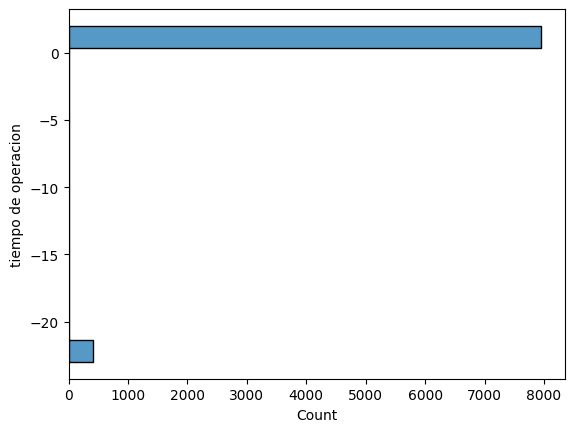

In [13]:
sns.histplot(data=df,y="tiempo de operacion")

## Ajuste de datos atipicos Promedio de autos

Se implementa un ciclo de control for que divida entre dos en el caso que encuentre diferencias entre mediciones de 2 horas, caso contrario no modifica el promedio de autos

In [14]:
ajustado=[]

for i in range(0,8364,1):
  if fg[i]== 2:
    ajustado.append(sd[i]/2)
  elif fg[i]< 0:
    ajustado.append(sd[i])
  else:
   ajustado.append(sd[i])
i=i+1
 

Los elementos se añaden a la lista al data frame con un nuevo nombre

In [15]:
df["Promedio ajustado"]=ajustado

In [16]:
df.head()

,Unnamed: 0,Hora inicio,Hora fin,Promedio carros,Hora de inicio,Hora de fin,tiempo de operacion,Promedio ajustado
0,0,2021-03-21 00:00:00,2021-03-21 02:00:00,857,00:00:00,02:00:00,2,428.5
1,1,2021-03-21 02:00:00,2021-03-21 03:00:00,400,02:00:00,03:00:00,1,400.0
2,2,2021-03-21 03:00:00,2021-03-21 04:00:00,396,03:00:00,04:00:00,1,396.0
3,3,2021-03-21 04:00:00,2021-03-21 06:00:00,759,04:00:00,06:00:00,2,379.5
4,4,2021-03-21 06:00:00,2021-03-21 07:00:00,423,06:00:00,07:00:00,1,423.0


Al realizar una visualizacion de datos  se observan datos atipicos que indican que hay fecha entre la hora de inicio y la hora de fin que son mayores o inferiores a 2 horas, lo cual indica que no todas la observaciones fueron tomadas en un periodo de tiempo definido ( 1 hora) estos datos generan pertubacion a la distirbucion de los mismos, frente al caso hay dos opciones de tratamiento 1) eliminarlos y no tomar estas observaciones o 2) ajustarlos , Se procede a eliminar los datos atipicos cuyo tiempo de operacion es menor "0" usando la funcion drop este nuevo dataframe se llama dt


## Eliminando datos atipicos

In [17]:
dt=df.drop(df[df["tiempo de operacion"]<0].index)


In [18]:
dt.describe()

,Unnamed: 0,Promedio carros,tiempo de operacion,Promedio ajustado
count,7948.000000,7948.000000,7948.000000,7948.000000
mean,4181.763966,475.299446,1.188978,399.856568
std,2414.601232,157.505284,0.391516,19.058193
min,0.000000,330.000000,1.000000,330.000000
25%,2091.750000,390.000000,1.000000,387.000000
50%,4182.500000,406.000000,1.000000,399.500000
75%,6272.250000,429.000000,1.000000,412.000000
max,8363.000000,908.000000,2.000000,479.000000


# Preguntas

* Genera la gráfica de densidad de los datos originlaes y los datos tratados (tenga en cuenta el tratamiento de los lapsos de dos horas para que no se afecte la media). Use el mismo gráfico para visualizar ambas curvas.

<Axes: xlabel='Promedio ajustado', ylabel='Density'>

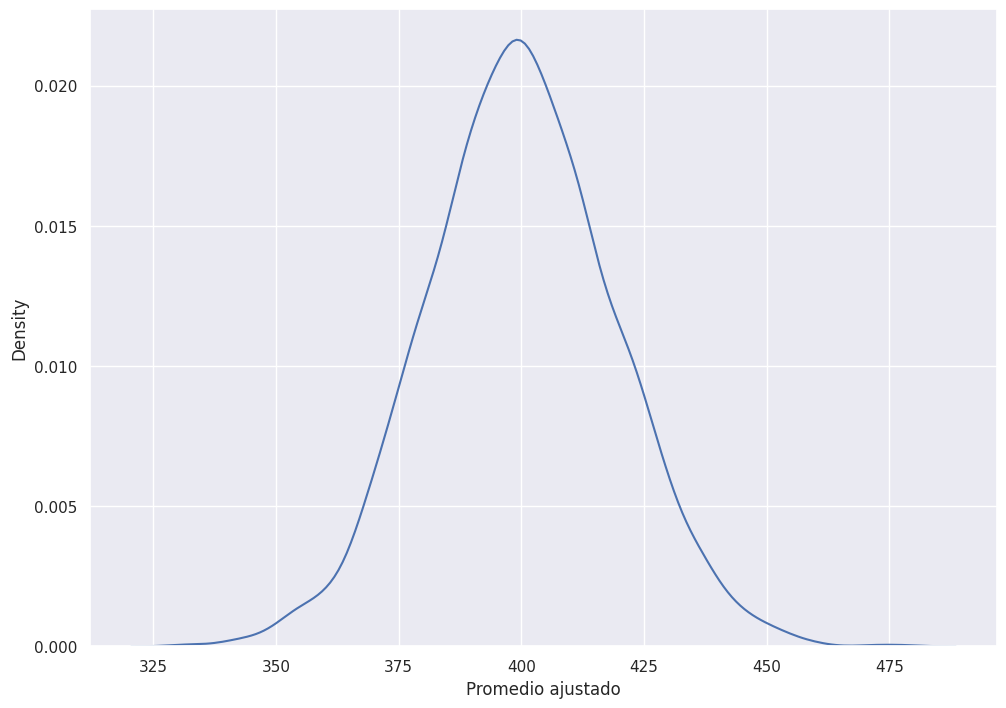

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=dt, x="Promedio ajustado") ### el dataframe ya tratado

<Axes: xlabel='Promedio ajustado', ylabel='Count'>

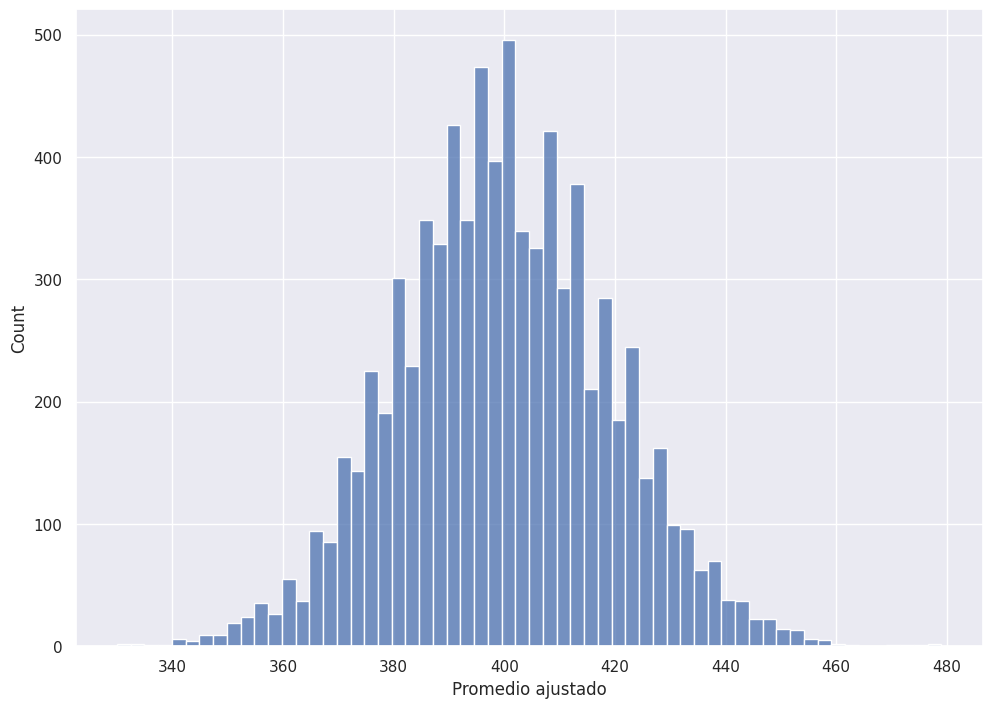

In [67]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=dt, x="Promedio ajustado") ### el dataframe ya tratado

<Axes: xlabel='Promedio ajustado', ylabel='Count'>

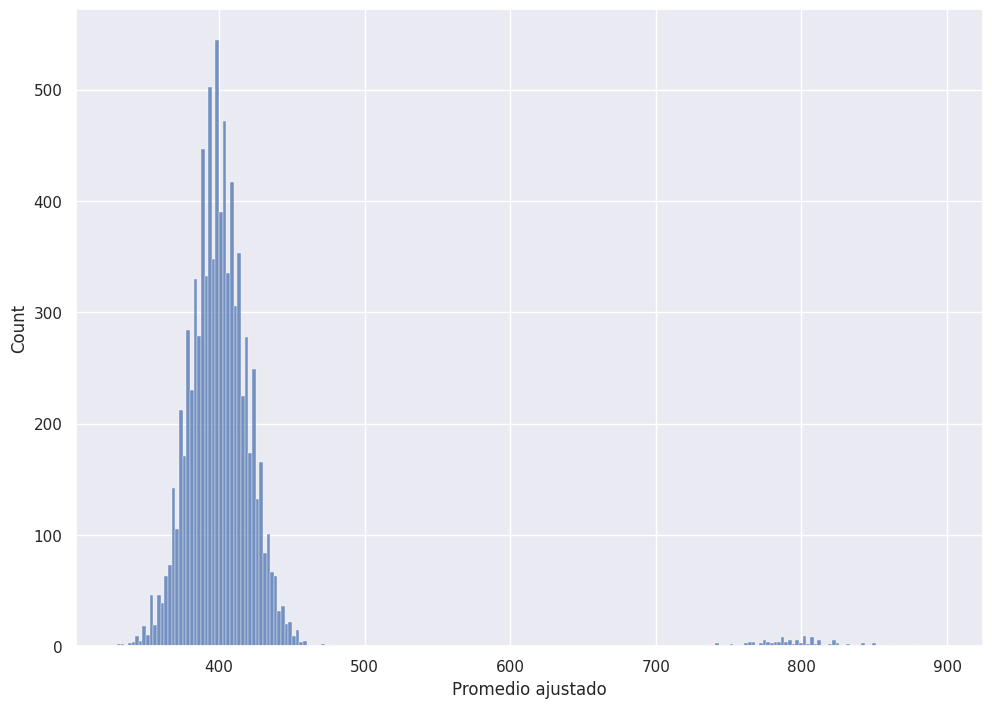

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="Promedio ajustado") ### el dataframe NO tratado

<Axes: xlabel='Promedio ajustado', ylabel='Density'>

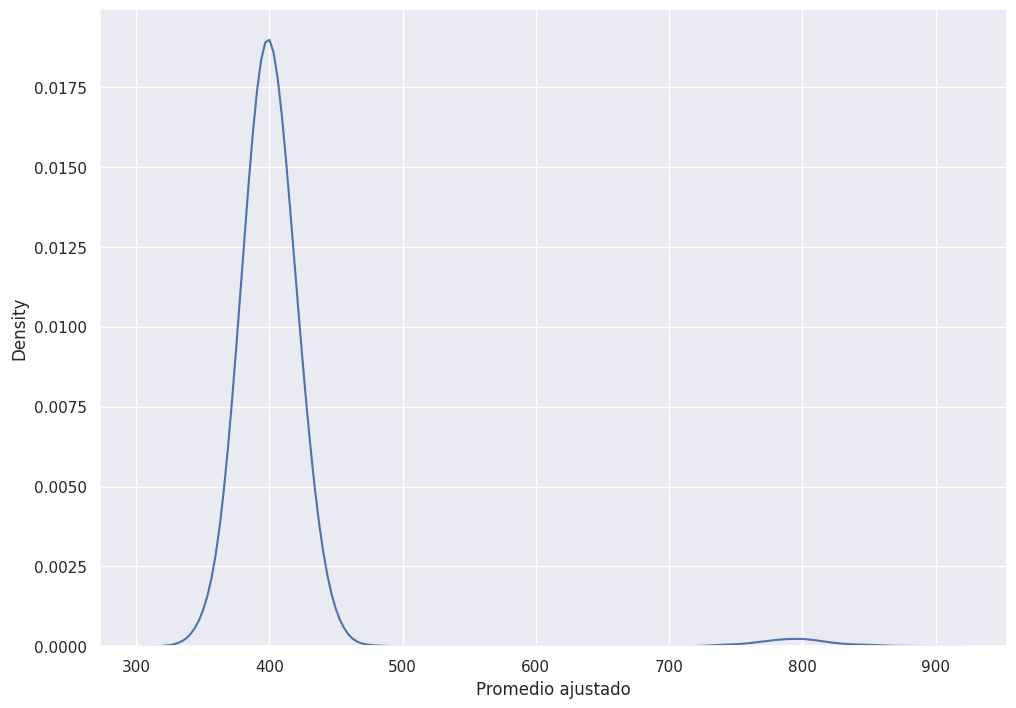

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="Promedio ajustado") ### el dataframe NO tratado

* Cuál es la probabilidad de que pasen 395 autos por el peaje en una hora?

In [23]:
import numpy as np
from scipy.stats import norm


In [24]:
## prob de que tome un valor 395
norm.pdf(x=395 ,loc= 399.85,scale=19.05)


0.020274030910759078

* Cuál es la probabilidad de que pasen a lo sumo 320 autos por el peaje en una hora?

In [59]:
##P(X<=320)
norm.cdf(320,399.85,19.05)

1.3849638275543425e-05

* Cuál es la probabilidad de que pasen al menos 400 autos por el peaje en una hora?

In [26]:
1-norm.cdf(400,399.85,19.05)

0.49685875466119767

* Cuál es la probabilidad de que pasen a lo sumo 320 autos por el peaje entre las 2 p.m. y 3 p.m. específicamente?

Extrayendo la hora de inicio y hora final creando un nuevo dataframe

In [38]:
WE=df['Hora inicio']
WS=df['Hora fin']

In [42]:
dt.head()

,Unnamed: 0,Hora inicio,Hora fin,Promedio carros,Hora de inicio,Hora de fin,tiempo de operacion,Promedio ajustado
0,0,2021-03-21 00:00:00,2021-03-21 02:00:00,857,00:00:00,02:00:00,2,428.5
1,1,2021-03-21 02:00:00,2021-03-21 03:00:00,400,02:00:00,03:00:00,1,400.0
2,2,2021-03-21 03:00:00,2021-03-21 04:00:00,396,03:00:00,04:00:00,1,396.0
3,3,2021-03-21 04:00:00,2021-03-21 06:00:00,759,04:00:00,06:00:00,2,379.5
4,4,2021-03-21 06:00:00,2021-03-21 07:00:00,423,06:00:00,07:00:00,1,423.0


In [43]:
dt["HORA I"]=WE.dt.hour
dt["HORA F"]=WS.dt.hour

In [46]:
dt.head()

,Unnamed: 0,Hora inicio,Hora fin,Promedio carros,Hora de inicio,Hora de fin,tiempo de operacion,Promedio ajustado,HORA I,HORA F
0,0,2021-03-21 00:00:00,2021-03-21 02:00:00,857,00:00:00,02:00:00,2,428.5,0,2
1,1,2021-03-21 02:00:00,2021-03-21 03:00:00,400,02:00:00,03:00:00,1,400.0,2,3
2,2,2021-03-21 03:00:00,2021-03-21 04:00:00,396,03:00:00,04:00:00,1,396.0,3,4
3,3,2021-03-21 04:00:00,2021-03-21 06:00:00,759,04:00:00,06:00:00,2,379.5,4,6
4,4,2021-03-21 06:00:00,2021-03-21 07:00:00,423,06:00:00,07:00:00,1,423.0,6,7


In [51]:
ds=dt.drop(dt[dt["HORA I"]!=2].index)

In [52]:
ds.head()


,Unnamed: 0,Hora inicio,Hora fin,Promedio carros,Hora de inicio,Hora de fin,tiempo de operacion,Promedio ajustado,HORA I,HORA F
1,1,2021-03-21 02:00:00,2021-03-21 03:00:00,400,02:00:00,03:00:00,1,400.0,2,3
21,21,2021-03-22 02:00:00,2021-03-22 03:00:00,358,02:00:00,03:00:00,1,358.0,2,3
40,40,2021-03-23 02:00:00,2021-03-23 03:00:00,355,02:00:00,03:00:00,1,355.0,2,3
61,61,2021-03-24 02:00:00,2021-03-24 04:00:00,806,02:00:00,04:00:00,2,403.0,2,4
81,81,2021-03-25 02:00:00,2021-03-25 03:00:00,397,02:00:00,03:00:00,1,397.0,2,3


In [54]:
dr=dt.drop(dt[dt["HORA F"]!=3].index)

In [55]:
dr.head()

,Unnamed: 0,Hora inicio,Hora fin,Promedio carros,Hora de inicio,Hora de fin,tiempo de operacion,Promedio ajustado,HORA I,HORA F
1,1,2021-03-21 02:00:00,2021-03-21 03:00:00,400,02:00:00,03:00:00,1,400.0,2,3
21,21,2021-03-22 02:00:00,2021-03-22 03:00:00,358,02:00:00,03:00:00,1,358.0,2,3
40,40,2021-03-23 02:00:00,2021-03-23 03:00:00,355,02:00:00,03:00:00,1,355.0,2,3
81,81,2021-03-25 02:00:00,2021-03-25 03:00:00,397,02:00:00,03:00:00,1,397.0,2,3
100,100,2021-03-26 02:00:00,2021-03-26 03:00:00,380,02:00:00,03:00:00,1,380.0,2,3


In [56]:
dr.describe()


,Unnamed: 0,Promedio carros,tiempo de operacion,Promedio ajustado,HORA I,HORA F
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.0
mean,4168.396648,477.519553,1.192737,400.663408,1.807263,3.0
std,2423.747718,158.065399,0.395001,18.485303,0.395001,0.0
min,1.000000,350.000000,1.000000,350.000000,1.000000,3.0
25%,2126.000000,393.000000,1.000000,388.000000,2.000000,3.0
50%,4102.500000,407.000000,1.000000,401.000000,2.000000,3.0
75%,6266.750000,430.750000,1.000000,412.000000,2.000000,3.0
max,8353.000000,908.000000,2.000000,454.000000,2.000000,3.0


<Axes: xlabel='Promedio ajustado', ylabel='Density'>

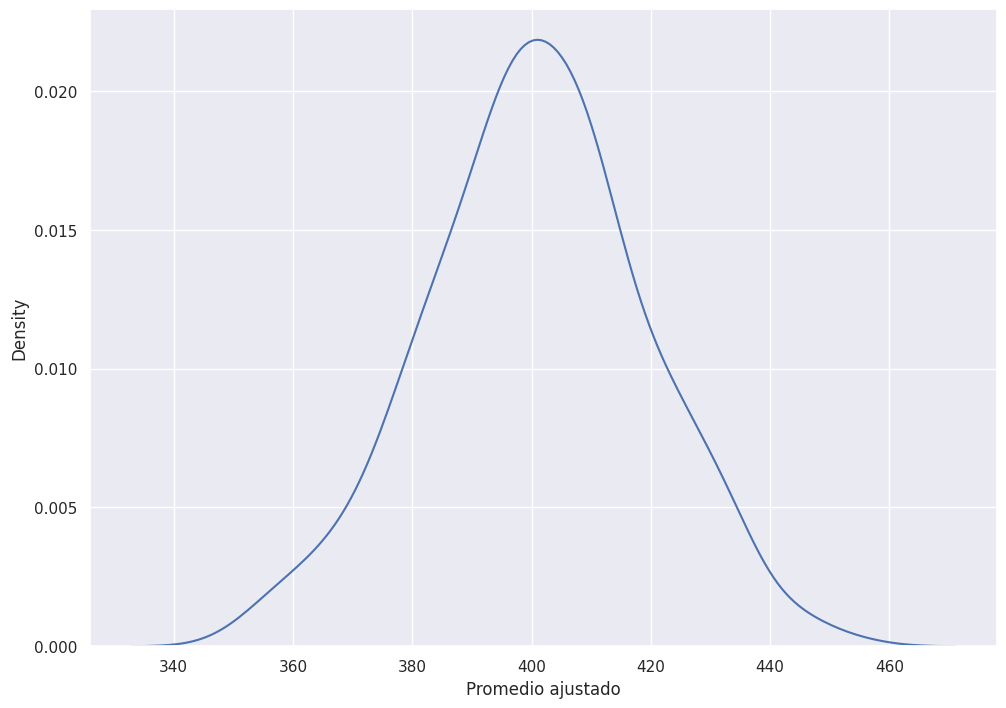

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=dr, x="Promedio ajustado") ### el dataframe ya tratado con solo el promedio de auto entre las 2 y 3

<Axes: xlabel='Promedio ajustado', ylabel='Count'>

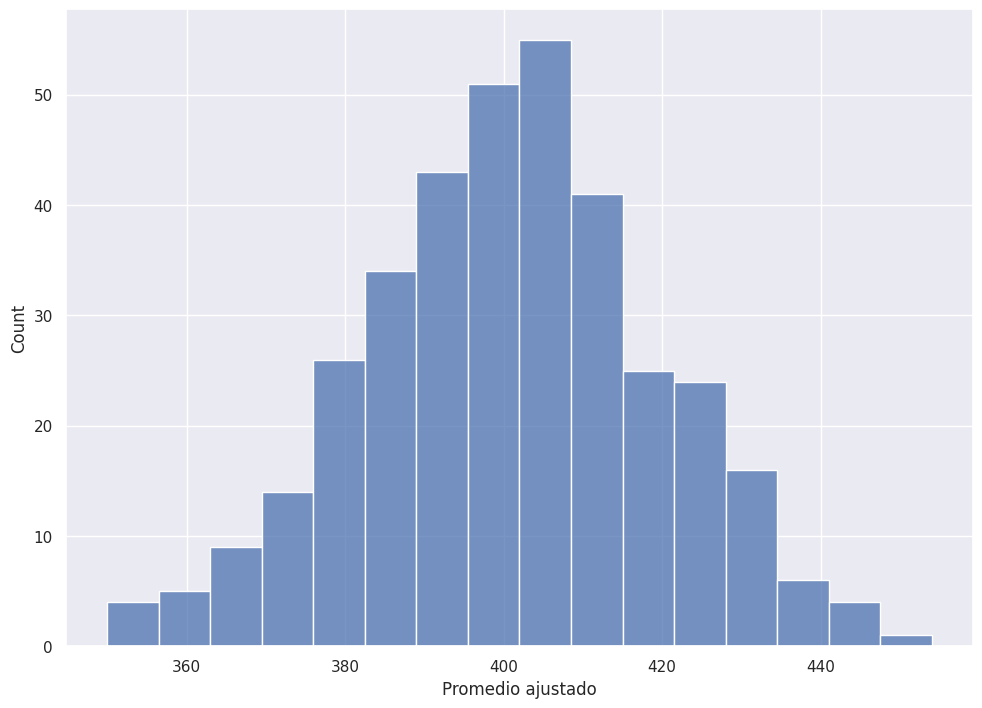

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=dr, x="Promedio ajustado") ### el dataframe ya tratado con solo el promedio de auto entre las 2 y 3

Datafram dr que posee solo los registros cuya hora inicial es "2" y final "3"

In [60]:
norm.cdf(320,400.66,18.48)

6.364324892985395e-06